In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel('student_scores.xlsx')
df.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Dataset
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
       Hours (x)  Scores (y)
count  25.000000   25.000000
mean    5.012000   51.480000
std     2.525094   25.286887
min     1.100000   17.000000
25%     2.700000   30.000000
50%     4.800000   47.000000
75%     7.400000   75.000000
max     9.200000   95.000000


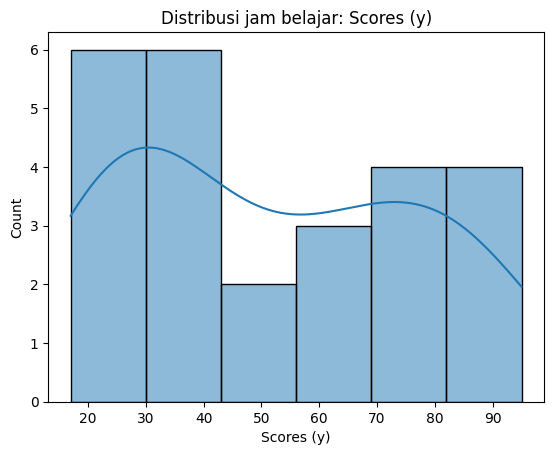

In [22]:
sns.histplot(df[df.columns[-1]], kde=True)
plt.title(f'Distribusi jam belajar: {df.columns[-1]}')
plt.show()

In [8]:
print("Jumlah data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah data duplikat: 0


In [26]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Hours (x)     0
Scores (y)    0
dtype: int64


In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers  = ((df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR))).sum()
print('jumlah outlier:\n', outliers)

jumlah outlier:
 Hours (x)     0
Scores (y)    0
dtype: int64


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Hours (x)']]
y = df['Scores (y)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
'Linear Regression': LinearRegression(),
'Decision Tree': DecisionTreeRegressor(random_state=42),
'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f} | R2: {r2:.2f}')

Linear Regression MSE: 18.94 | R2: 0.97
Decision Tree MSE: 31.70 | R2: 0.95
Random Forest MSE: 13.05 | R2: 0.98
